1. Ekstraksi Garis dengan Hough Transform

Mounted at /content/drive


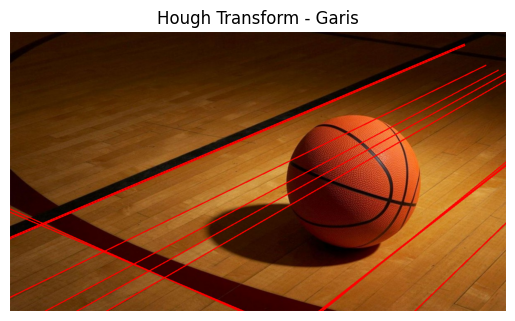

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file gambar
image_path = '/content/drive/My Drive/Week11/Bola basket.jpg'

# Muat gambar
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    # Konversi gambar ke grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan Canny Edge Detection
    edges = cv2.Canny(image_gray, 50, 150, apertureSize=3)

    # Penerapan Hough Transform untuk mendeteksi garis
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    # Check if lines were detected
    if lines is not None:
        # Gambar garis pada gambar asli
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Tampilkan hasil
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Hough Transform - Garis')
    plt.axis('off')
    plt.show()

2. Template Matching untuk Deteksi Objek

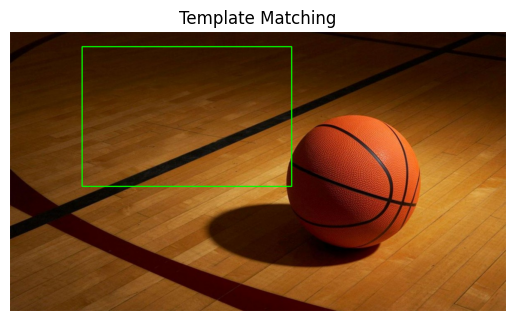

In [2]:
# Muat gambar dan template
image_path1 = '/content/drive/My Drive/Week11/Bola basket.jpg'
image1 = cv2.imread(image_path1)  # Ganti dengan path gambar utama
template_path = '/content/drive/My Drive/Week11/basket2.jpg'  # Path template
template = cv2.imread(template_path)  # Ganti dengan path template

# Konversi keduanya ke grayscale
image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Template Matching
result = cv2.matchTemplate(image_gray, template_gray, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Koordinat lokasi terbaik untuk template
top_left = max_loc
h, w = template.shape[:2]
bottom_right = (top_left[0] + w, top_left[1] + h)

# Gambar persegi pada area yang cocok
cv2.rectangle(image1, top_left, bottom_right, (0, 255, 0), 2)

# Tampilkan hasil
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Template Matching')
plt.axis('off')
plt.show()


3. Pembuatan Pyramid Gambar

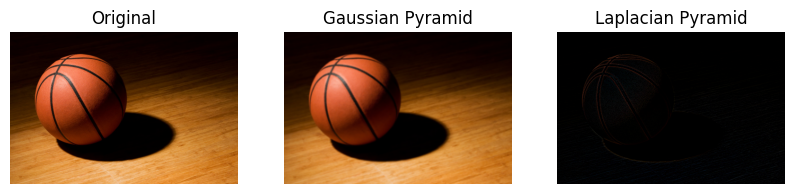

In [3]:
# Pembuatan Pyramid Gambar
# ------------------------
image_path1 = '/content/drive/My Drive/Week11/basket2.jpg'
image4 = cv2.imread(image_path1)  # Ganti dengan path gambar

# Gaussian Pyramid (Downsampling)
lower_reso = cv2.pyrDown(image4)

# Upsampling (Gaussian Pyramid) dan Sesuaikan Ukuran
upper_reso = cv2.pyrUp(lower_reso)
upper_reso = cv2.resize(upper_reso, (image4.shape[1], image4.shape[0]))

# Laplacian Pyramid (Detail Enhancing)
laplacian = cv2.subtract(image4, upper_reso)

# Tampilkan gambar asli dan hasil pyramid
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(lower_reso, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Pyramid')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.title('Laplacian Pyramid')
plt.axis('off')
plt.show()


4. Deteksi Lingkaran Menggunakan Hough Transform

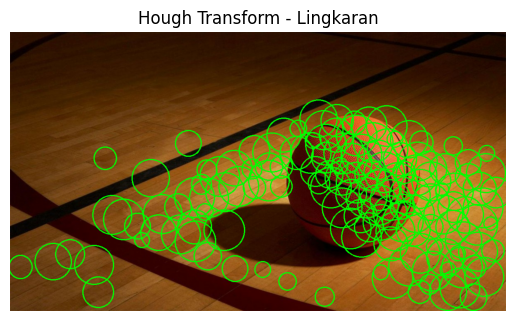

In [4]:
# Simulasi 4: Deteksi Lingkaran Menggunakan Hough Transform
# ---------------------------------------------------------
image_path2 = '/content/drive/My Drive/Week11/Bola basket.jpg'
image5 = cv2.imread(image_path2)  # Ganti dengan path gambar
image_gray = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)

# Hough Circle Detection
circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=15, maxRadius=50)

# Gambar lingkaran
if circles is not None:
    circles = np.round(circles[0, :]).astype('int')
    for (x, y, r) in circles:
        cv2.circle(image5, (x, y), r, (0, 255, 0), 2)

# Tampilkan hasil
plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Lingkaran')
plt.axis('off')
plt.show()

5. Ekstraksi Warna Dominan pada Gambar

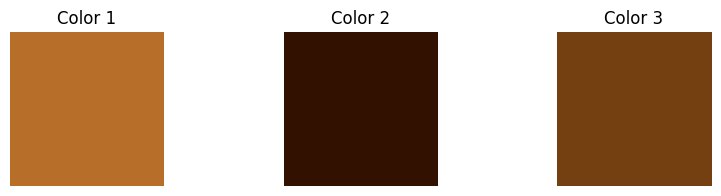

In [5]:
# Ekstraksi Warna Dominan pada Gambar
# -----------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path ke file gambar
image_path5 = '/content/drive/My Drive/Week11/Bola basket.jpg'
image5 = cv2.imread(image_path5)  # Ganti dengan path gambar
image = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)  # Konversi ke RGB

# Ubah gambar menjadi array 2D untuk clustering
pixels = image.reshape((-1, 3))  # Flatten menjadi 2D array
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixels)  # Clustering dengan 3 warna dominan
dominant_colors = kmeans.cluster_centers_.astype('int')  # Warna dominan dalam RGB

# Tampilkan warna dominan
plt.figure(figsize=(10, 2))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, 3, i + 1)
    plt.imshow([[color / 255]])  # Normalisasi warna (0-1)
    plt.title(f'Color {i + 1}')
    plt.axis('off')
plt.show()


6. Deteksi Kontur pada Gambar.

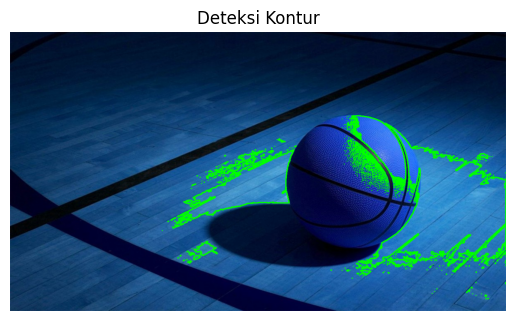

In [6]:
# Simulasi 6: Deteksi Kontur pada Gambar
# --------------------------------------
image_path6 = '/content/drive/My Drive/Week11/Bola basket.jpg'
image6 = cv2.imread(image_path6)  # Ganti dengan path gambar
image_gray = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)

# Thresholding untuk binerisasi gambar
_, binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Deteksi kontur
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for contour in contours:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Tampilkan hasil
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Kontur')
plt.axis('off')
plt.show()
